## Objective:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from xgboost import XGBClassifier
from sklearn import metrics

In [3]:
data_easy=pd.read_csv("EasyVisa.csv")
data=data_easy.copy()

In [4]:
'''from google.colab import drive
drive.mount('/content/drive')
data_easy=pd.read_csv("/content/drive/My Drive/Colab Notebooks/EasyVisa.csv")
data=data_easy.copy()'''

'from google.colab import drive\ndrive.mount(\'/content/drive\')\ndata_easy=pd.read_csv("/content/drive/My Drive/Colab Notebooks/EasyVisa.csv")\ndata=data_easy.copy()'

## Data Overview

- Observations
- Sanity checks

In [4]:
data.shape

(25480, 12)

#### Observations
* There are 12 columns and 25480 rows of data

In [5]:
data.sample(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
19483,EZYV19484,Asia,Master's,Y,N,3026,2013,Northeast,90418.07,Year,Y,Denied
613,EZYV614,Asia,Master's,Y,N,3298,2005,South,47844.12,Year,N,Certified
8866,EZYV8867,Asia,Bachelor's,Y,N,2711,2004,South,33989.59,Year,Y,Certified
13034,EZYV13035,Asia,Master's,Y,N,3825,1993,Midwest,108869.01,Year,N,Certified
17821,EZYV17822,Asia,Bachelor's,N,N,2413,1986,South,28279.36,Year,Y,Certified
5680,EZYV5681,Europe,Master's,Y,N,2094,2010,Northeast,117448.63,Year,Y,Certified
24066,EZYV24067,Europe,Master's,Y,N,736,2004,Northeast,41309.02,Year,Y,Certified
24922,EZYV24923,Asia,Master's,Y,N,4247,2007,Northeast,46829.34,Year,Y,Certified
10628,EZYV10629,Asia,Bachelor's,Y,N,837,2001,South,143108.79,Year,Y,Certified
13952,EZYV13953,Asia,Bachelor's,Y,N,1476,1863,West,22110.87,Year,Y,Denied


#### Observations
* The case_id is unique to each row and can be dropped from the dataset


In [6]:
data.drop(["case_id"],axis=1, inplace=True)
data.sample(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25321,Asia,Doctorate,N,N,915,1989,Midwest,42824.0500,Year,Y,Denied
17885,Asia,Bachelor's,N,N,1946,2006,West,127548.4600,Year,Y,Denied
18623,Asia,Bachelor's,Y,N,3477,2012,Island,92922.5100,Year,Y,Certified
7762,Asia,Master's,Y,N,1997,1850,West,110971.9000,Year,Y,Certified
22872,Asia,High School,Y,N,2142,1902,South,230.0556,Hour,Y,Certified
17081,Asia,Bachelor's,Y,N,3350,2009,West,94005.3400,Week,Y,Certified
330,Asia,Doctorate,Y,N,1485,1993,Northeast,91290.3800,Year,Y,Certified
8540,Europe,Bachelor's,Y,N,1157,1999,Midwest,46579.4500,Year,Y,Certified
23406,Asia,High School,N,N,2866,1985,Northeast,201434.3600,Year,Y,Certified
13935,Asia,High School,N,N,1164,1994,Midwest,36949.8000,Year,Y,Denied


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [8]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [10]:
#Converting the object types into categories
cols = data.select_dtypes(['object'])
for i in cols.columns:
    data[i] = data[i].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.5 KB


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate Analysis


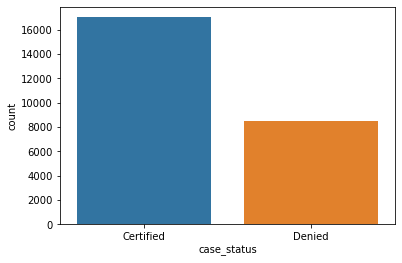

In [13]:
sns.countplot(data=data.case_status, x=data.index);

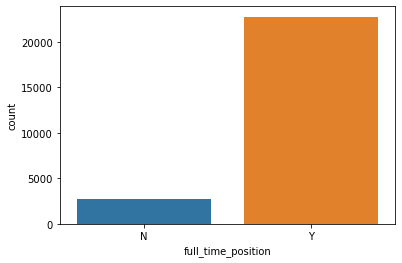

In [14]:
sns.countplot(data=data.full_time_position, x=data.index);

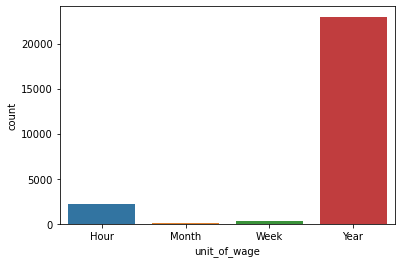

In [15]:
sns.countplot(data=data.unit_of_wage, x=data.index);

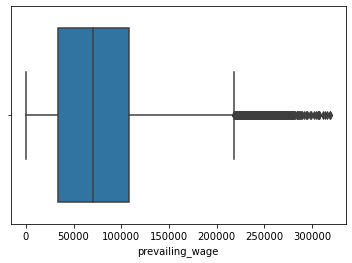

In [16]:
sns.boxplot(data=data.prevailing_wage ,x=data.index);

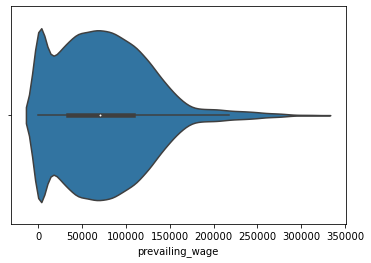

In [17]:
sns.violinplot(data=data, x="prevailing_wage");

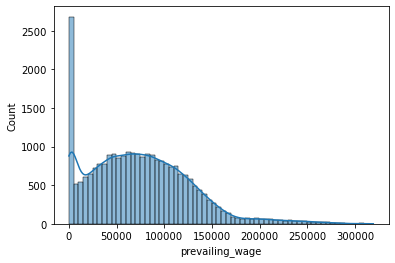

In [18]:
sns.histplot(data, x="prevailing_wage", kde=True);

In [19]:
data.region_of_employment.value_counts(normalize=True)


Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: region_of_employment, dtype: float64

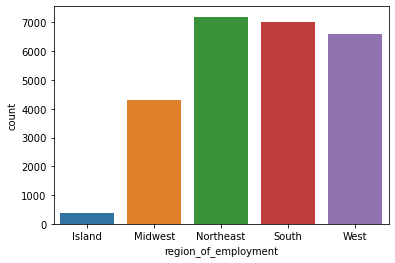

In [20]:
sns.countplot(data=data, x="region_of_employment");

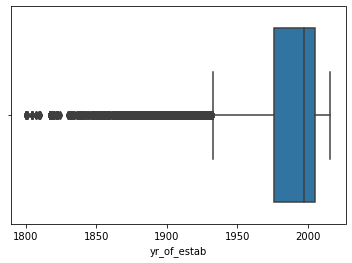

In [21]:
sns.boxplot(data=data, x="yr_of_estab");

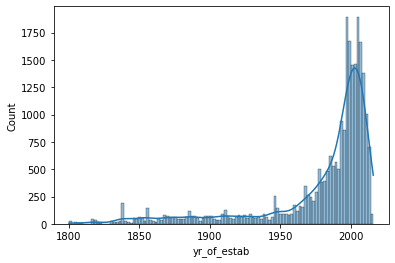

In [22]:
sns.histplot(data, x="yr_of_estab", kde=True);

#### Observations
* Year of establishment is heavily skewed to the left

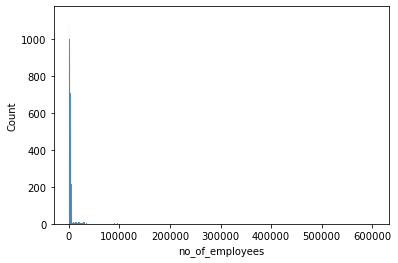

In [23]:
sns.histplot(data=data, x="no_of_employees");

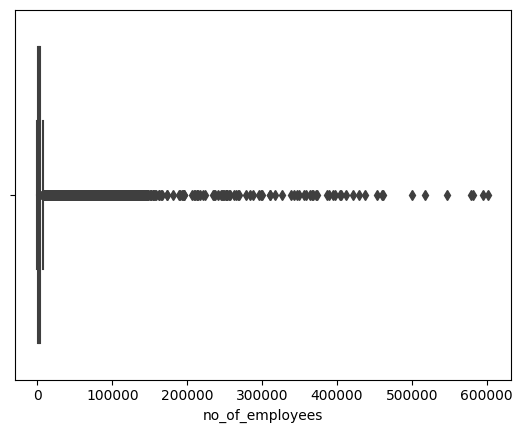

In [ ]:
sns.boxplot(data=data, x="no_of_employees");

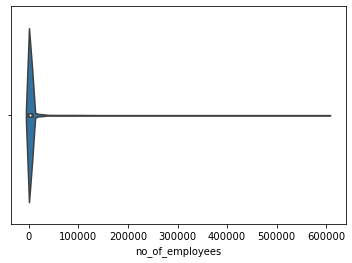

In [24]:
sns.violinplot(data=data, x="no_of_employees");

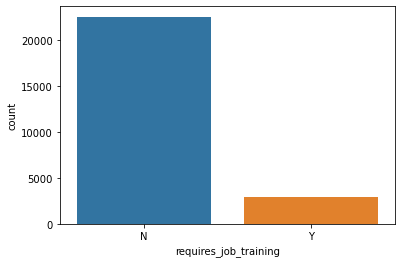

In [25]:
sns.countplot(data=data, x="requires_job_training");

#### Observation
* Most applocants do not require job training. They already have the required skill level

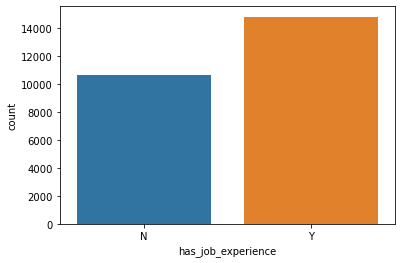

In [26]:
sns.countplot(data=data, x="has_job_experience");

#### Observation
* Most applicants have working experience in a previous role. 

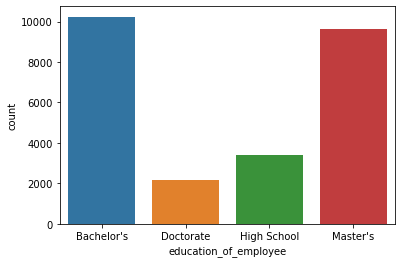

In [27]:
sns.countplot(data=data, x="education_of_employee");

In [28]:
data.education_of_employee.value_counts(normalize=True)

Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64

#### Observation
* 85% of applicants have an education level higher than a high school certificate

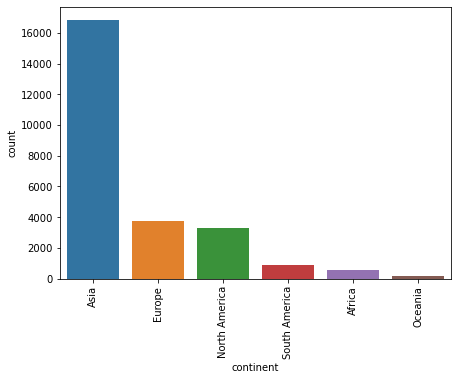

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(data=data, x="continent", order=data.continent.value_counts().index);
plt.xticks(rotation=90);

#### Observation
* Most applocants are from Asia. Europe and North America make up the top 3 continents based on volume of applicants

### Bivariate Analysis

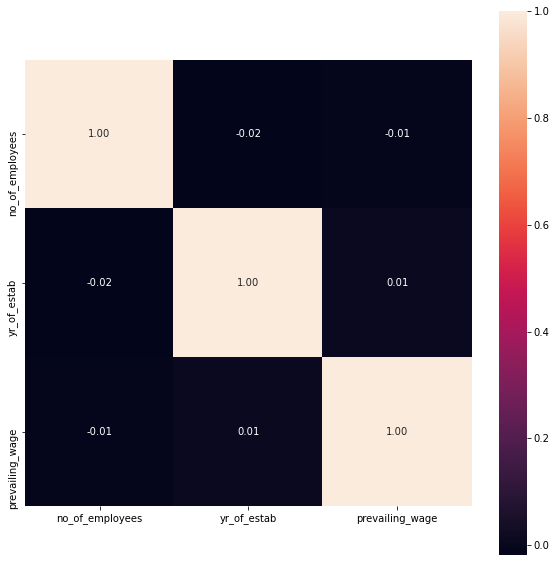

In [30]:
plt.figure(figsize=(10,10));
sns.heatmap(data=data.corr(),annot=True, square=True, fmt=".2f");

#### Observations
* There was no correlation of 0.68 among the numerical values. 
* Some analysis will be done to help in answering the leading questions. Futhur data exploration will be done through multivariate analysis

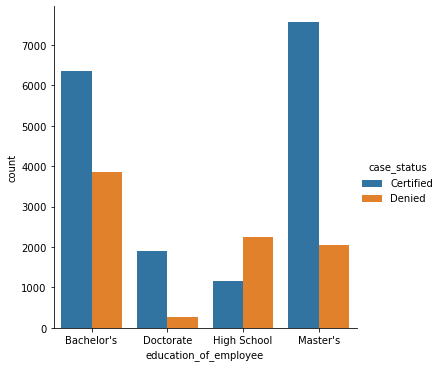

In [31]:
sns.catplot(data=data, x="education_of_employee", hue="case_status", kind="count");

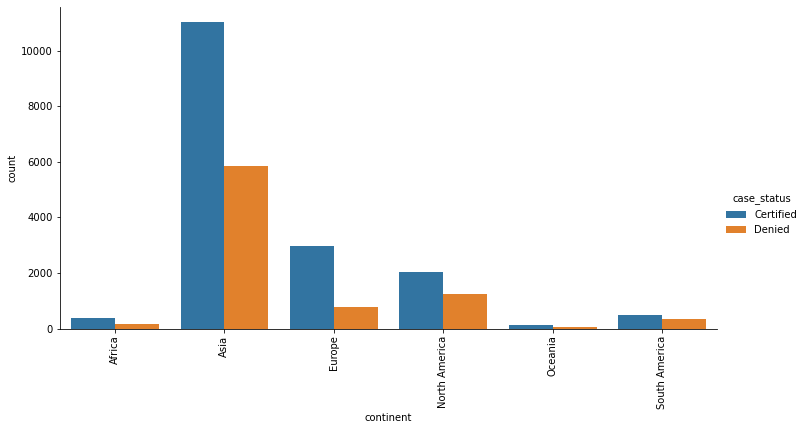

In [32]:
sns.catplot(data=data, x="continent", hue="case_status", kind="count", aspect=2);
plt.xticks(rotation=90);

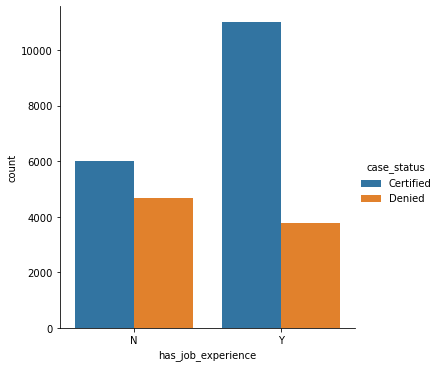

In [33]:
sns.catplot(data=data, x="has_job_experience", hue="case_status", kind="count");

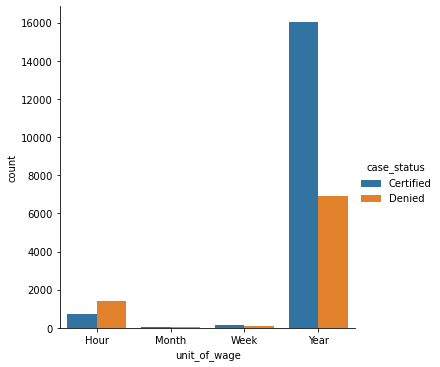

In [34]:
sns.catplot(data=data, x="unit_of_wage", hue="case_status", kind="count");

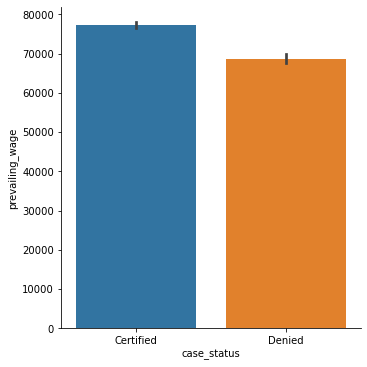

In [35]:
sns.catplot(data=data, x="case_status", y="prevailing_wage", kind="bar");

### Multvariate Analysis

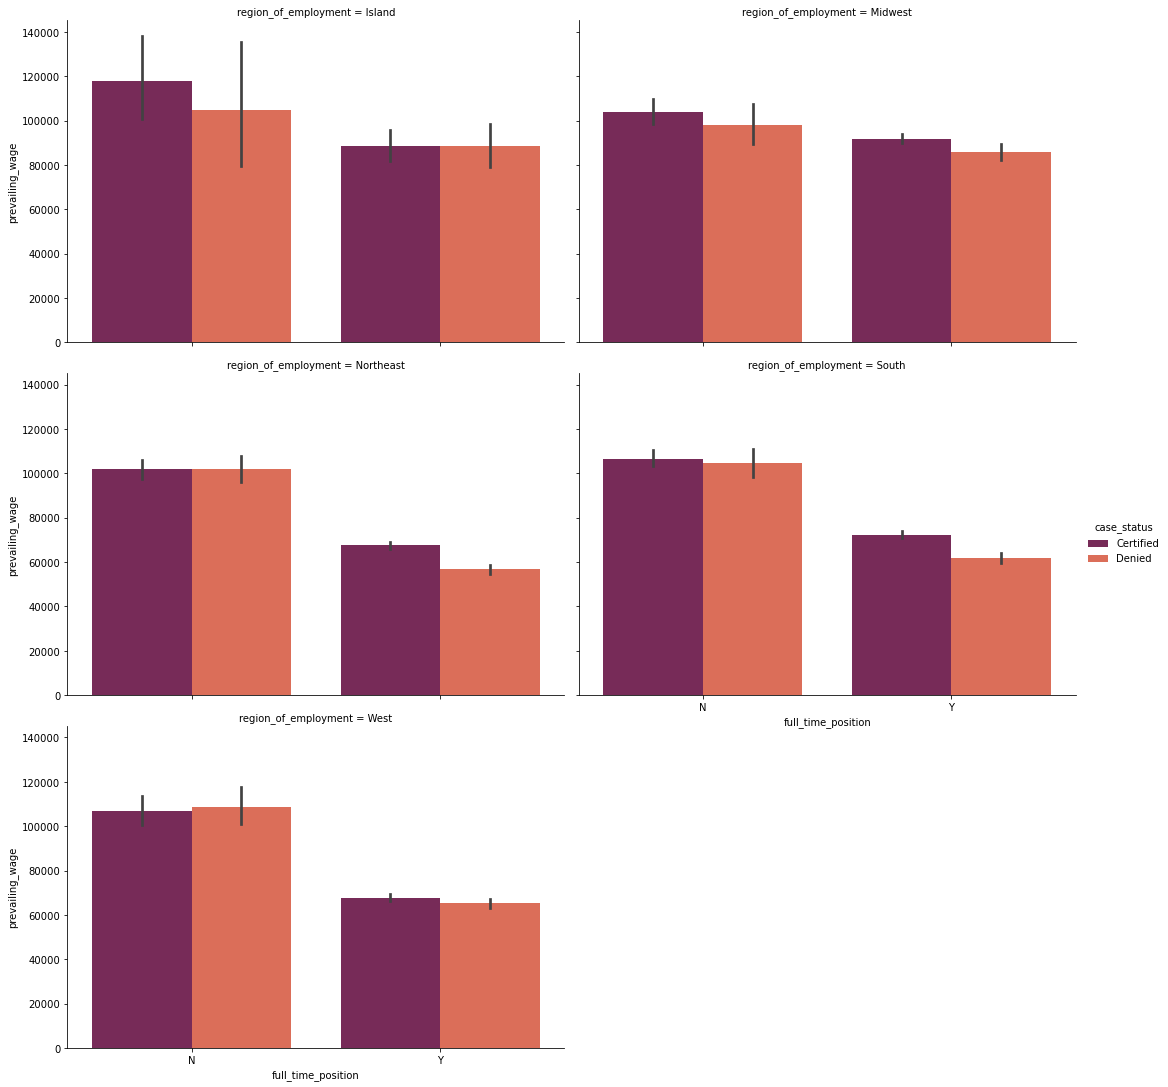

In [36]:
sns.catplot(data=data, x="full_time_position",y="prevailing_wage", hue="case_status", col="region_of_employment",kind="bar", col_wrap=2,palette="rocket", aspect=1.5);

#### Observation
* Number of applicants granted and denied visa status for full time and non-full time employees were even for most regions


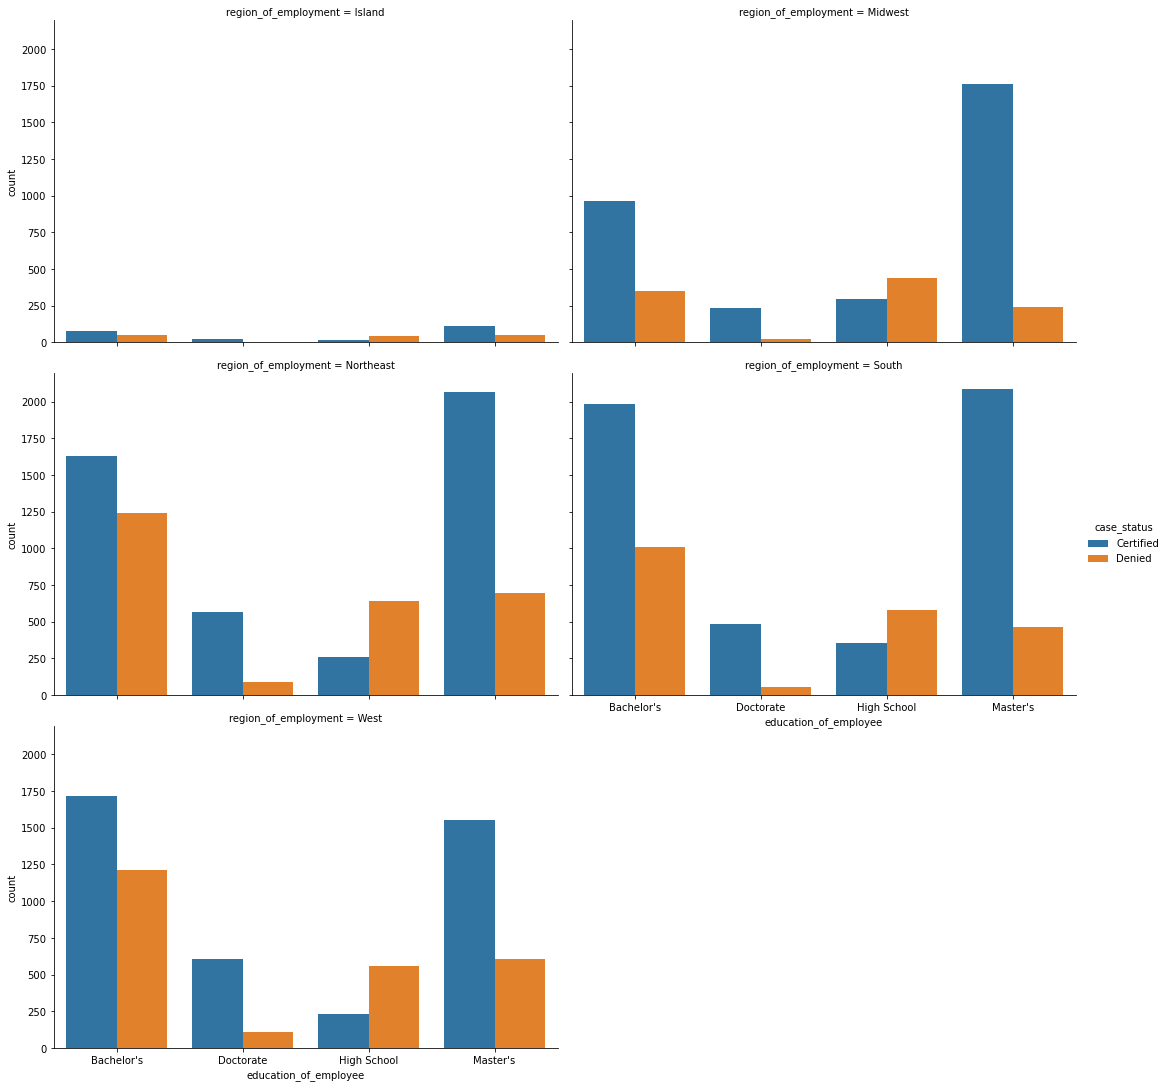

In [37]:
sns.catplot(data=data, x="education_of_employee", hue="case_status", col="region_of_employment",kind="count",col_wrap=2, aspect=1.5);

#### Observation
* Applicants with only high school degree have a higher chance of being rejected than being accepted. This trend was visible across all regions
* Appplicants with higher education levels were more likely to be accepted.


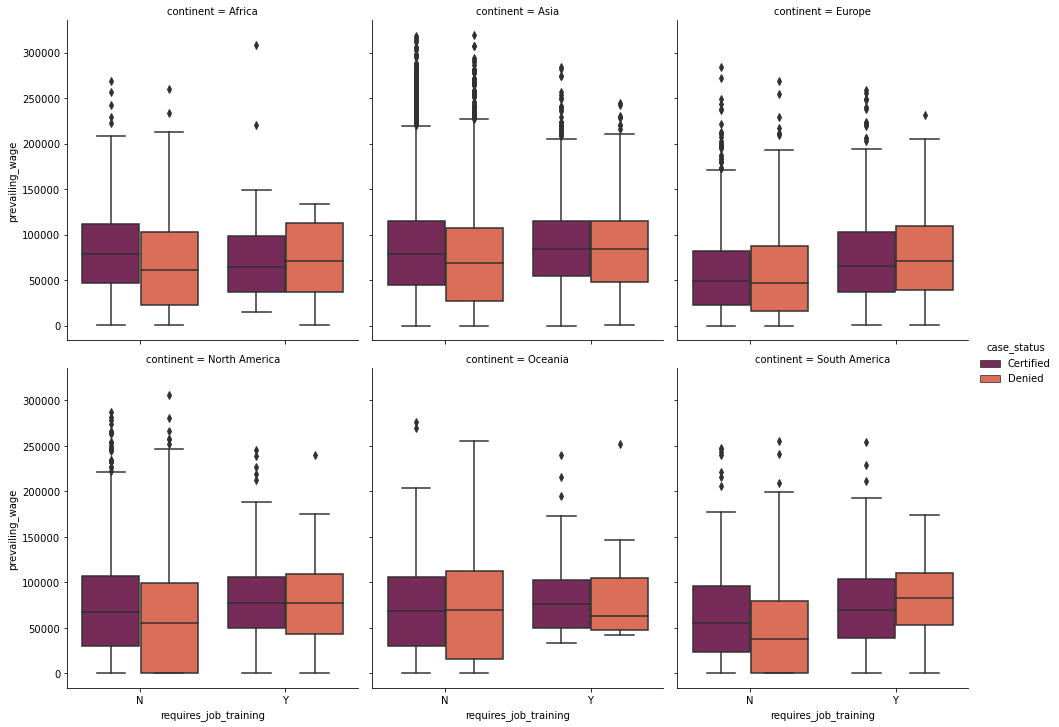

In [38]:
sns.catplot(data=data, x="requires_job_training", y="prevailing_wage", hue="case_status", col="continent",palette="rocket", kind="box", col_wrap=3, aspect=.9);

#### Observation
* The wage offered by the companies was fairly consisitent across all continents regardless of if the applicant required training or not

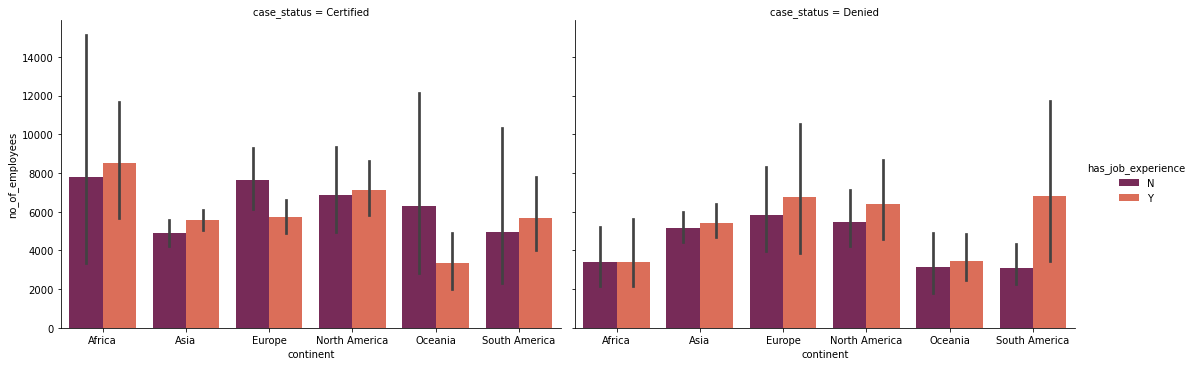

In [39]:
sns.catplot(data=data, x="continent", y="no_of_employees", hue="has_job_experience", kind="bar",col="case_status",palette="rocket",  aspect=1.5);

#### Observations
* Africa has the highers number of employees that did and did not have work experience. 
* Successful applicants that did not have job experience outnumbered those who did in Europe and Ocenia
* Most unsuccesfull appplicants had work experience

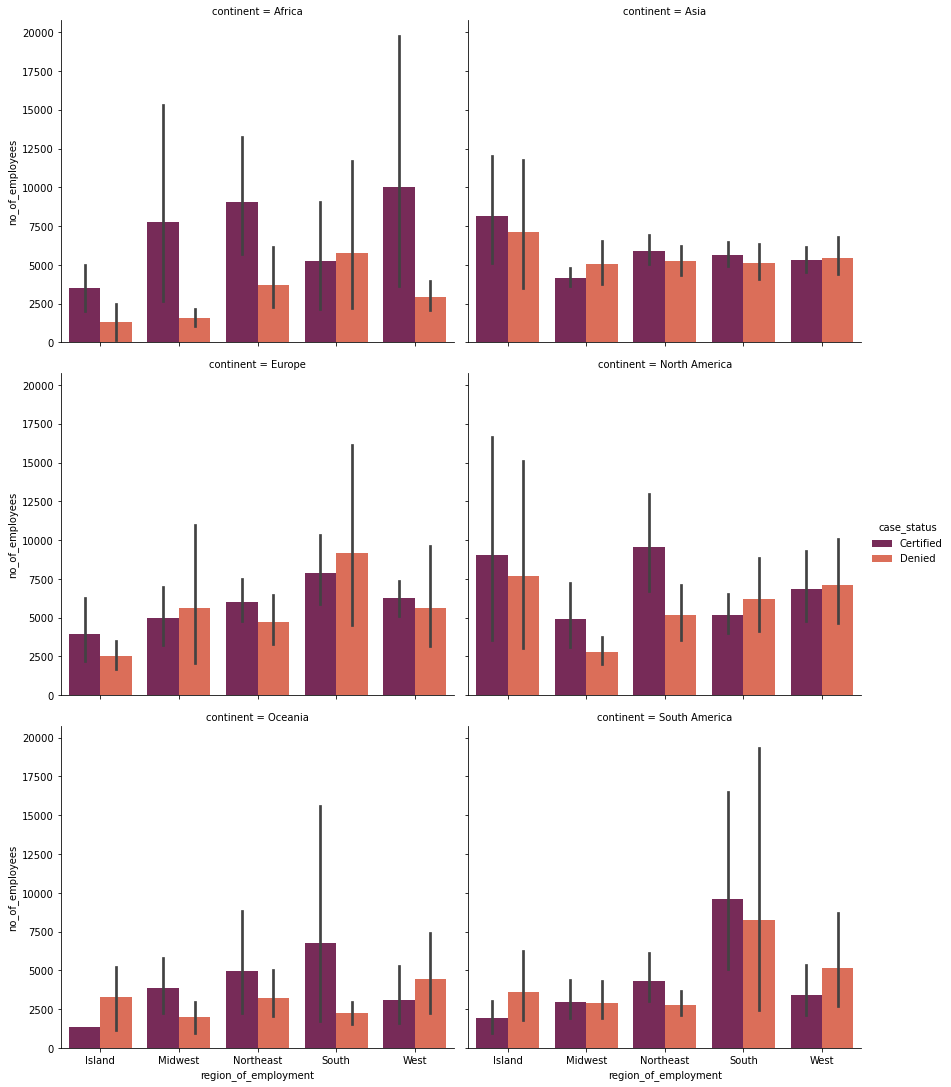

In [40]:
sns.catplot(data=data, x="region_of_employment", col="continent", y="no_of_employees", hue="case_status", kind="bar",palette="rocket", col_wrap=2, aspect=1.2);

#### Observations
* in Africa, most of the sucessful applicants are requested by the west region. The South produced the most unsuccessful applicants.
* In North America, most successful and unsuccessful applicants were applying to the island regions
* The South was the region with the most successful applicants from Ocenia, South America and Europe. It alos produced the highest number of unsuccessful applicants in South America and Europe. In Ocenia, most unsuccessfull applicants came from the island region
* In North America, North East produced the highest number of succesful employees while island region produced the kost unsuccessful applicants

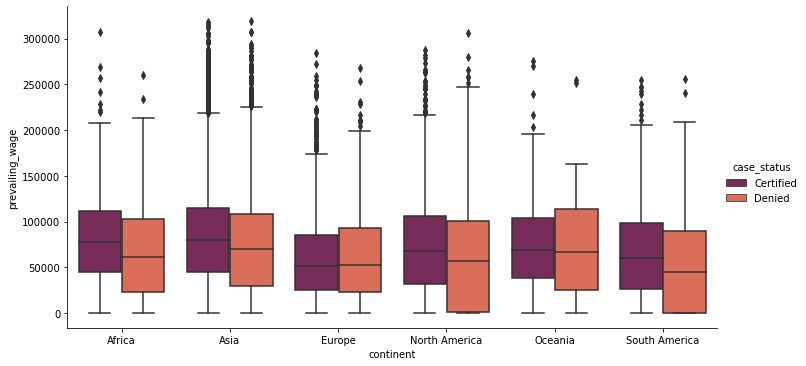

In [41]:
sns.catplot(data=data, x="continent", y="prevailing_wage", hue="case_status", kind="box", palette="rocket",aspect=2);

#### Observations
* Median wage value for unsucessfull applicants was less than that of the successfull applicantsin all continents except in Europe where they are equal

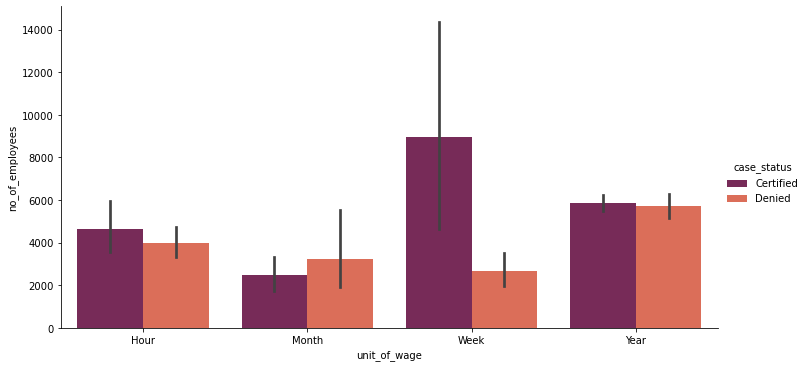

In [42]:
sns.catplot(data=data, x="unit_of_wage", y="no_of_employees", hue="case_status", kind="bar",palette="rocket", aspect=2);

#### Observation
* Most successful applicants prefer to be paid weekly.

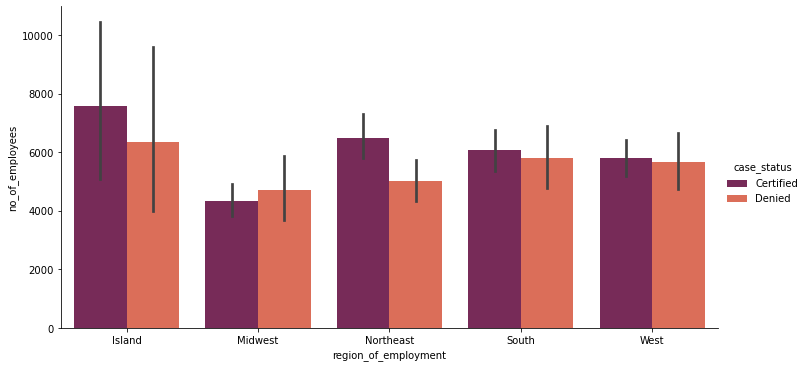

In [43]:
sns.catplot(data=data, x="region_of_employment", y="no_of_employees", hue="case_status",palette="rocket", kind="bar", aspect=2);

#### Observations
* In total, Island region produced the highest number of employees (Accepted and rejected applicants) from all regions

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [44]:
# Missing data check
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observation
* There are is no missing values

In [45]:
data.duplicated().sum()

0

#### Observations
* There is no duplicated values

In [46]:
# Converting the objects into categories
data.dtypes

continent                category
education_of_employee    category
has_job_experience       category
requires_job_training    category
no_of_employees             int64
yr_of_estab                 int64
region_of_employment     category
prevailing_wage           float64
unit_of_wage             category
full_time_position       category
case_status              category
dtype: object

In [47]:
#Converting the categorical variables into binary number
data['has_job_experience'] = data['has_job_experience'].apply(lambda x : 1 if x=='Y' else 0)
data['requires_job_training'] = data['requires_job_training'].apply(lambda x : 1 if x=='Y' else 0)
data['full_time_position'] = data['full_time_position'].apply(lambda x : 1 if x=='Y' else 0)
data['case_status'] = data['case_status'].apply(lambda x : 1 if x=='Certified' else 0)
data.sample(10)


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
11029,Asia,Doctorate,1,1,2292,1984,West,82907.88,Year,1,1
15309,Asia,Master's,0,0,943,1902,Midwest,126106.35,Year,1,1
12513,Asia,Bachelor's,1,0,164,2003,West,40461.49,Year,1,1
1958,Asia,Bachelor's,1,1,3211,2013,Northeast,109385.39,Year,1,1
1603,Asia,Bachelor's,1,1,501,1998,South,129895.13,Year,1,1
24117,Asia,Master's,1,0,1146,1911,South,84184.52,Year,1,1
15931,Asia,Master's,1,0,528,1979,South,124943.29,Year,1,1
18929,Asia,Master's,1,0,3341,2004,Midwest,129883.44,Year,1,1
7958,Asia,Master's,1,0,1244,2009,Northeast,38255.97,Year,1,1
18902,Asia,High School,1,0,2237,2007,West,2999.93,Year,1,0


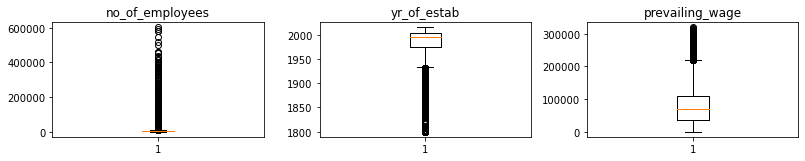

In [48]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [49]:
data.unit_of_wage.value_counts(normalize=True)

Year     0.901177
Hour     0.084655
Week     0.010675
Month    0.003493
Name: unit_of_wage, dtype: float64

#### Observations
* Outliers in prevailing wage is due to the difference in unit_of_wage(hourly, yearly, weekly and monthly). 

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate Analysis


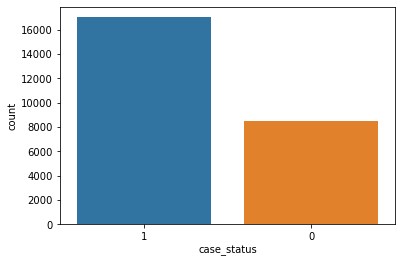

In [50]:
sns.countplot(data=data.case_status, x=data.index);

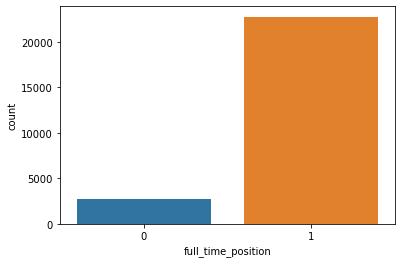

In [51]:
sns.countplot(data=data.full_time_position, x=data.index);

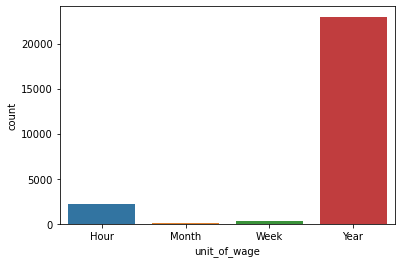

In [52]:
sns.countplot(data=data.unit_of_wage, x=data.index);

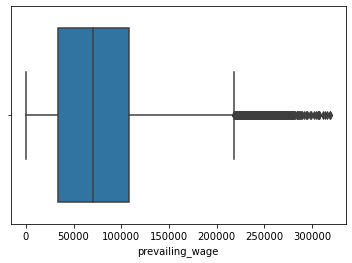

In [53]:
sns.boxplot(data=data.prevailing_wage ,x=data.index);

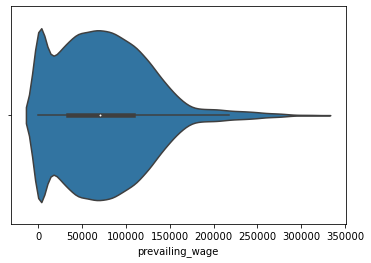

In [54]:
sns.violinplot(data=data, x="prevailing_wage");

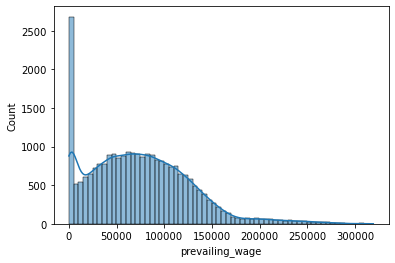

In [55]:
sns.histplot(data, x="prevailing_wage", kde=True);

In [56]:
data.region_of_employment.value_counts(normalize=True)


Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: region_of_employment, dtype: float64

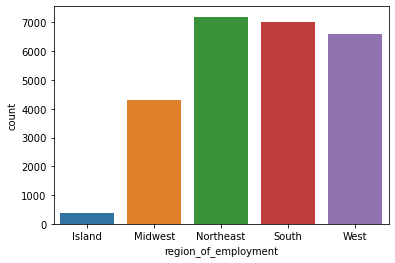

In [57]:
sns.countplot(data=data, x="region_of_employment");

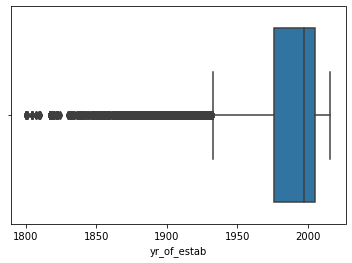

In [58]:
sns.boxplot(data=data, x="yr_of_estab");

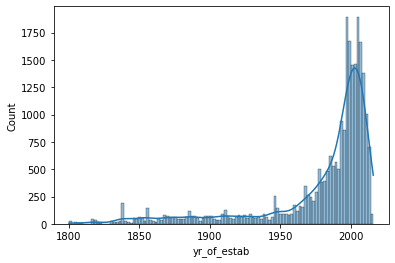

In [59]:
sns.histplot(data, x="yr_of_estab", kde=True);

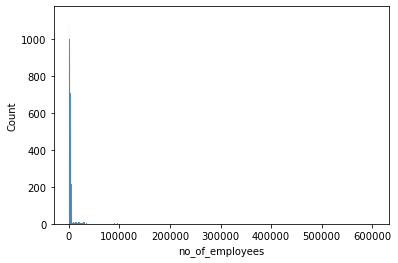

In [60]:
sns.histplot(data=data, x="no_of_employees");

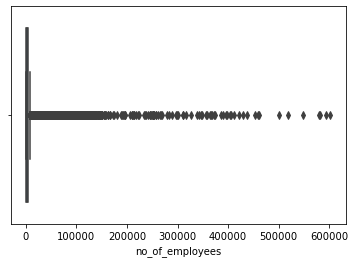

In [61]:
sns.boxplot(data=data, x="no_of_employees");

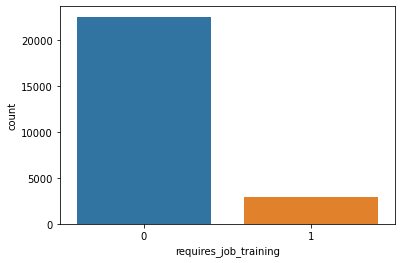

In [62]:
sns.countplot(data=data, x="requires_job_training");

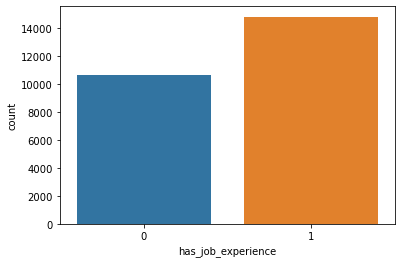

In [63]:
sns.countplot(data=data, x="has_job_experience");

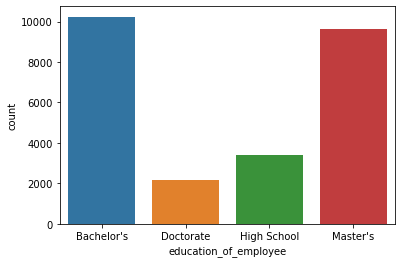

In [64]:
sns.countplot(data=data, x="education_of_employee");

In [65]:
data.education_of_employee.value_counts(normalize=True)

Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64

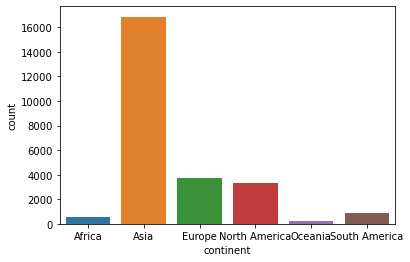

In [66]:
sns.countplot(data=data, x="continent");

### Bivariate Analysis


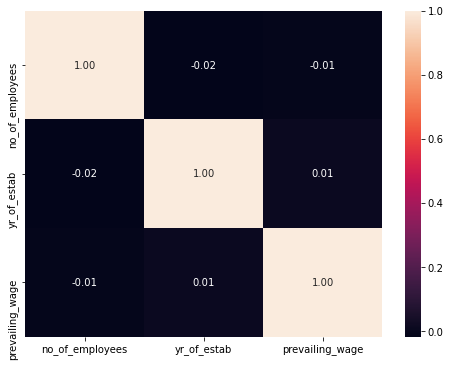

In [67]:
plt.figure(figsize=(8,6));
sns.heatmap(data=data.corr(),annot=True, fmt=".2f");

### Multvariate Analysis

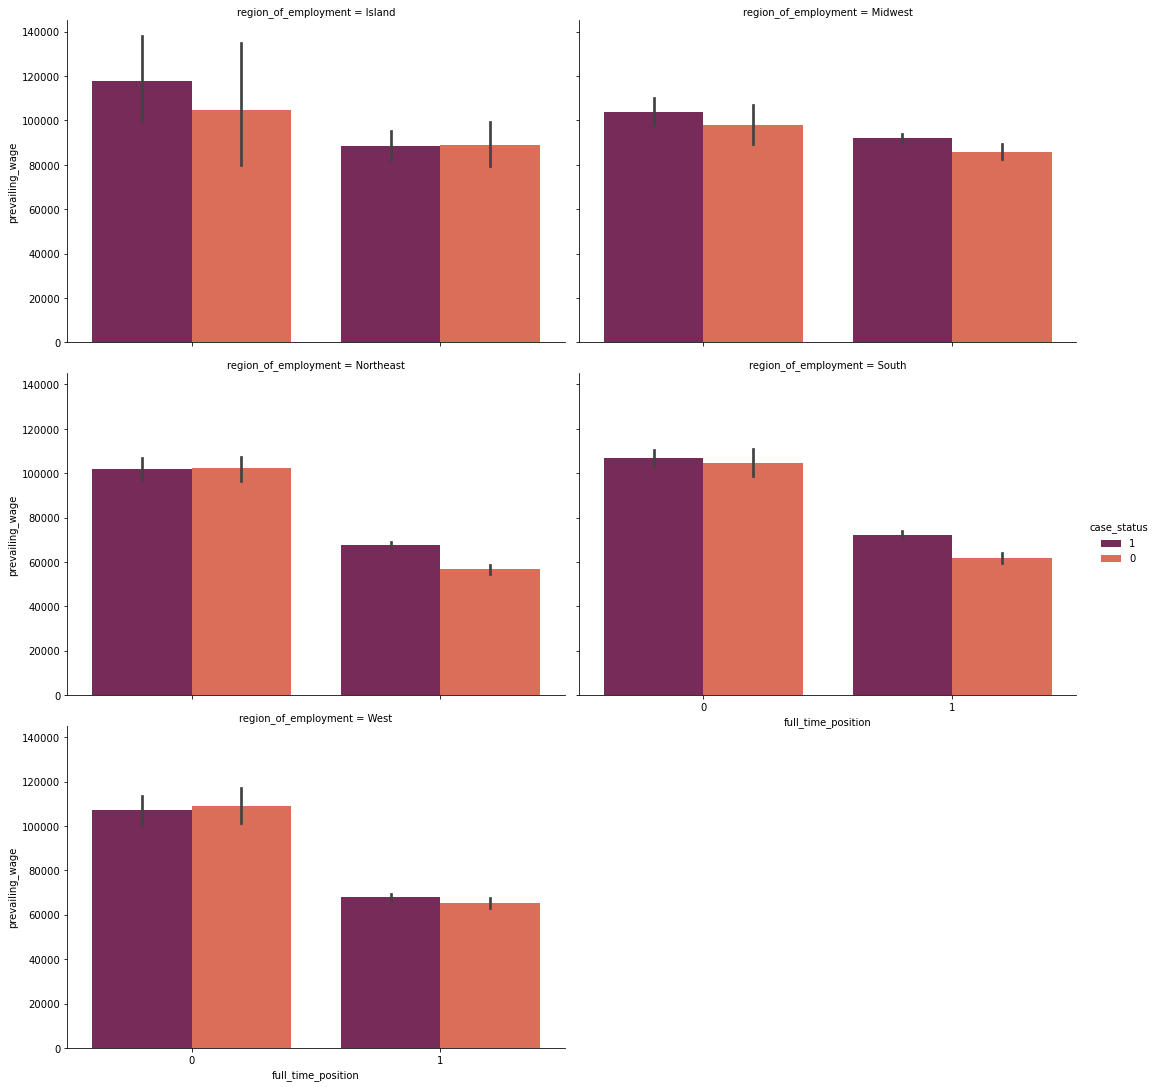

In [68]:
sns.catplot(data=data, x="full_time_position",y="prevailing_wage", hue="case_status", col="region_of_employment",kind="bar", col_wrap=2,palette="rocket", aspect=1.5);

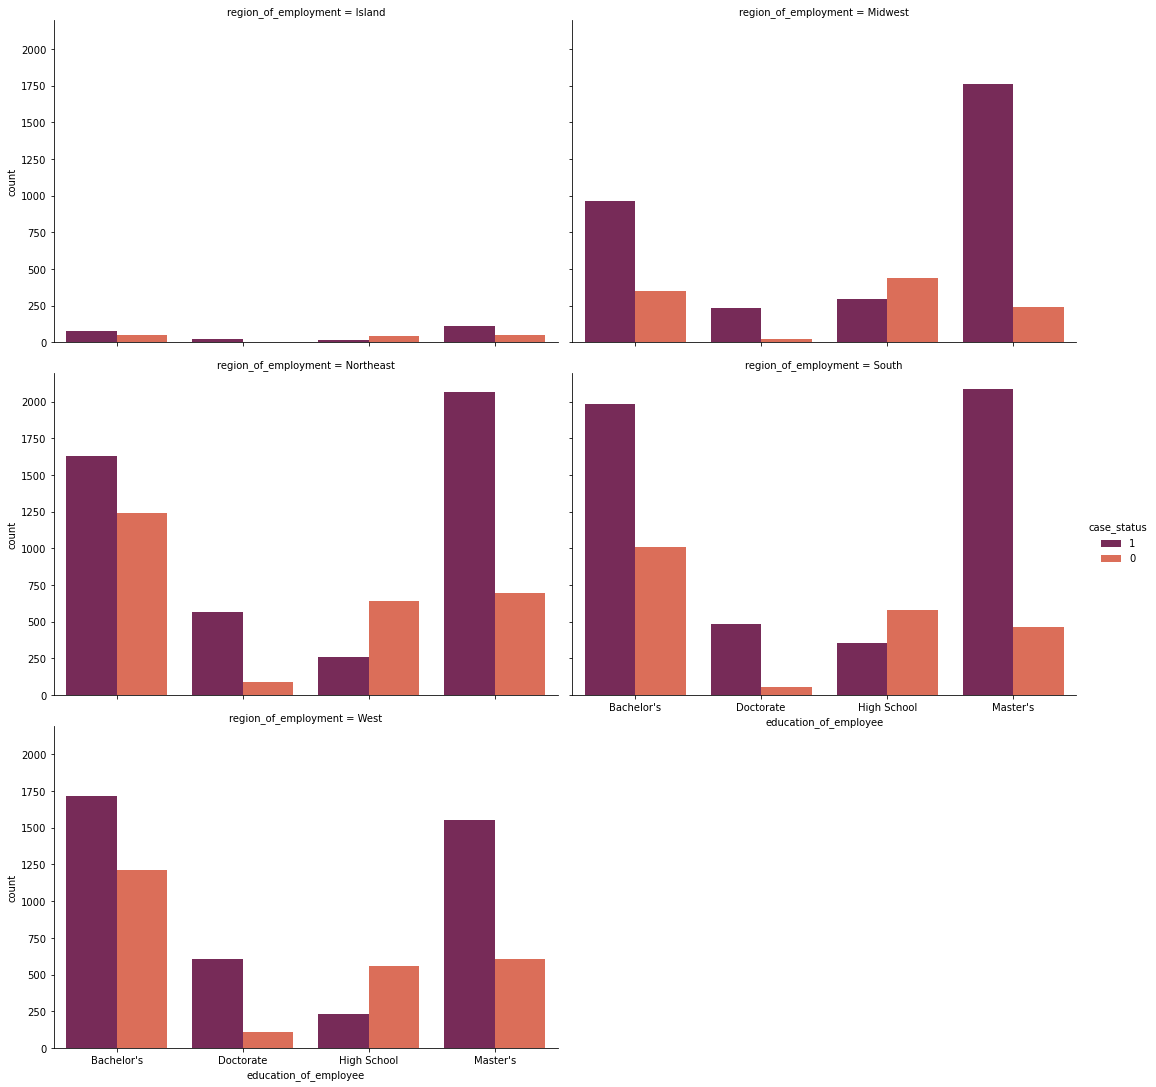

In [69]:
sns.catplot(data=data, x="education_of_employee", hue="case_status", col="region_of_employment",kind="count", palette="rocket",col_wrap=2, aspect=1.5);

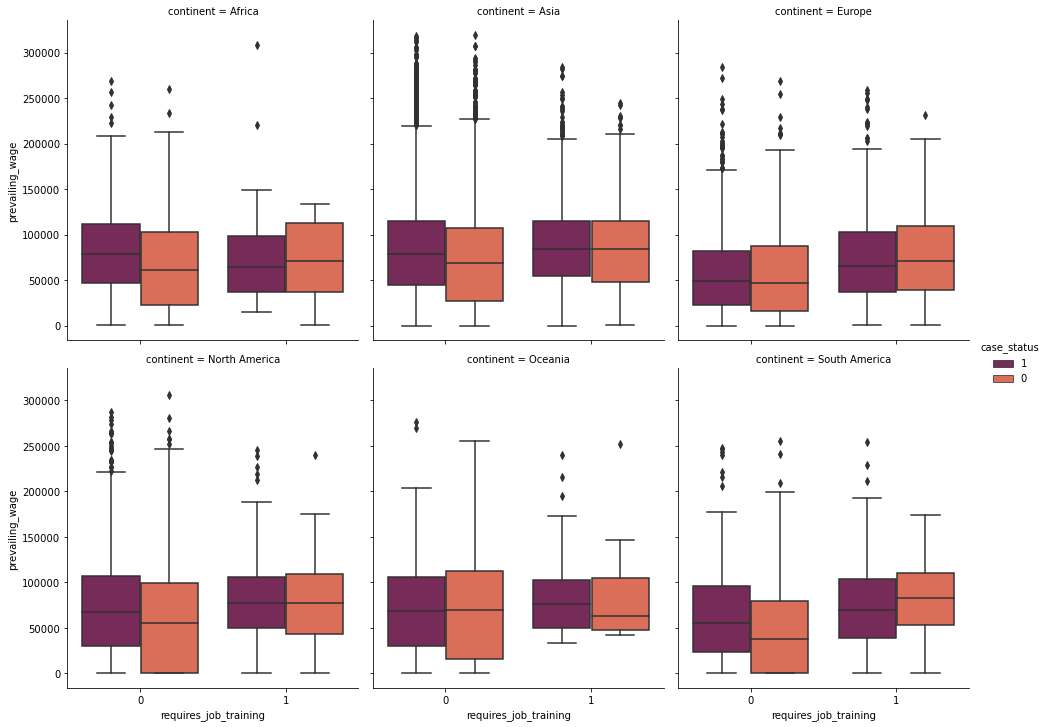

In [70]:
sns.catplot(data=data, x="requires_job_training", y="prevailing_wage", hue="case_status", col="continent",palette="rocket", kind="box", col_wrap=3, aspect=.9);

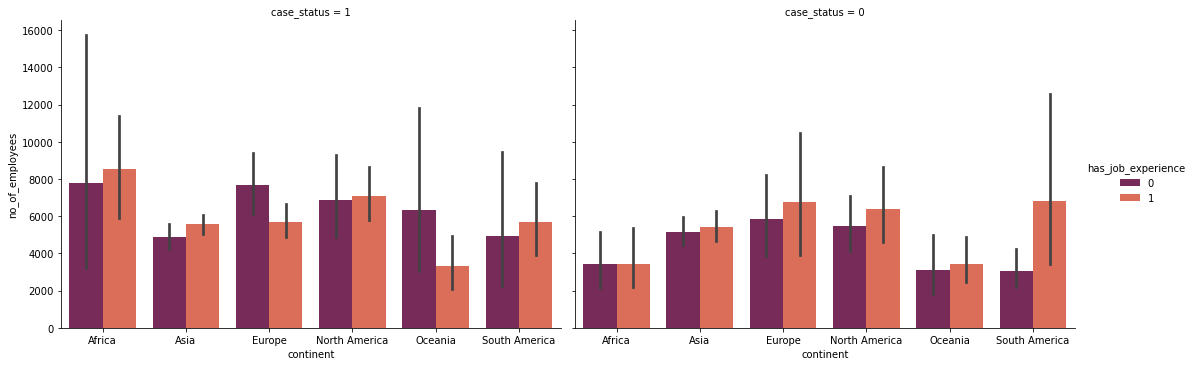

In [71]:
sns.catplot(data=data, x="continent", y="no_of_employees", hue="has_job_experience", kind="bar",col="case_status",palette="rocket",  aspect=1.5);

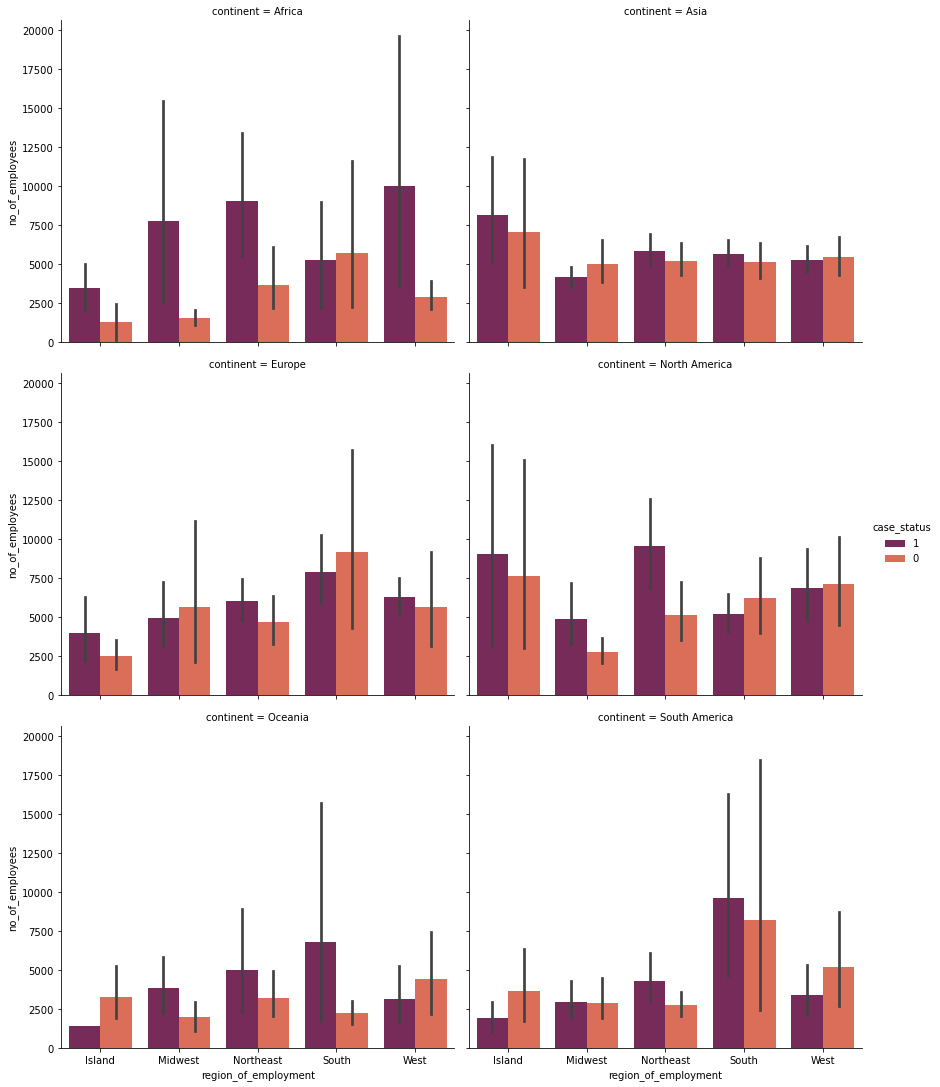

In [72]:
sns.catplot(data=data, x="region_of_employment", col="continent", y="no_of_employees", hue="case_status", kind="bar",palette="rocket", col_wrap=2, aspect=1.2);

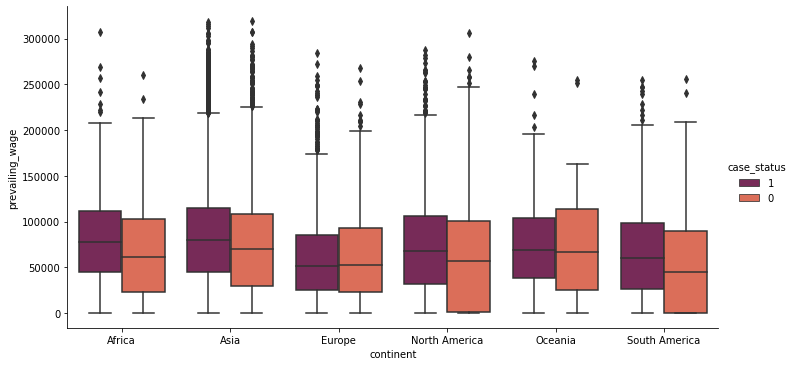

In [73]:
sns.catplot(data=data, x="continent", y="prevailing_wage", hue="case_status", kind="box", palette="rocket",aspect=2);

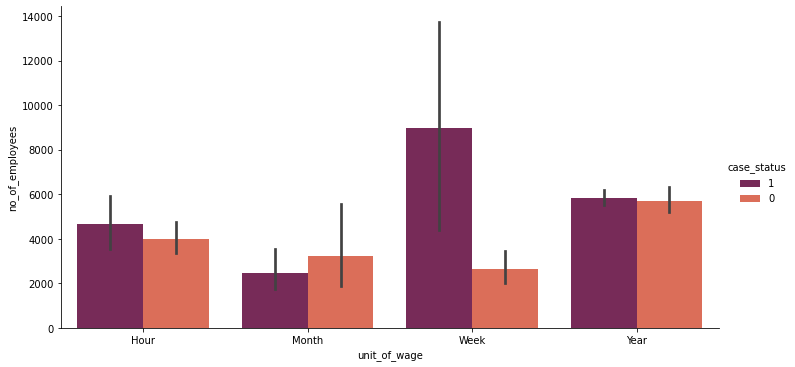

In [74]:
sns.catplot(data=data, x="unit_of_wage", y="no_of_employees", hue="case_status", kind="bar",palette="rocket", aspect=2);

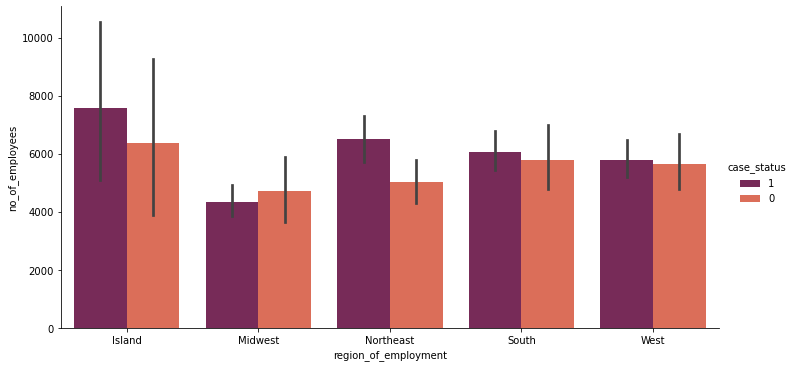

In [75]:
sns.catplot(data=data, x="region_of_employment", y="no_of_employees", hue="case_status",palette="rocket", kind="bar", aspect=2);

#### Observations
* Feature engineering did not affect the data. 

## Building bagging and boosting models

In [76]:
# splitting the data into the dependent and independent variables
X = data.drop("case_status", axis=1)
y = data["case_status"]
X = pd.get_dummies(X,drop_first=True)

In [77]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)


In [78]:
y_train.value_counts(normalize=True)

1    0.667919
0    0.332081
Name: case_status, dtype: float64

In [79]:
y_test.value_counts(normalize=True)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

#### Observation
* By using stratify=y, the certified and non-certified visa status has been split 70:30 between the training and test data

In [80]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [81]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Trees

In [82]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.3,1:0.7},random_state=1)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

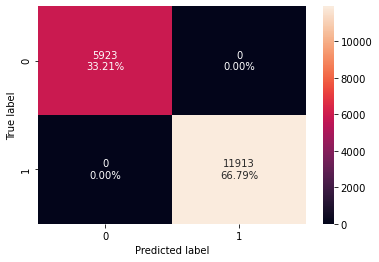

In [83]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [84]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


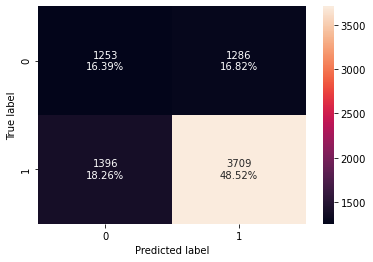

In [85]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [136]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.649137  0.726543   0.742543  0.734455


#### Observations
* The model is overfitted. This is due to the differnce in perfomance metrics when using training and testing data. 
* The price of false negatives is high. Therfore recall will be chosen as the perfomance metric


## Bagging Classifier


In [86]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

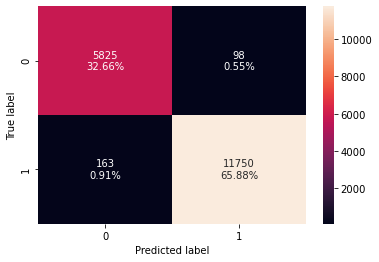

In [87]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [88]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985367  0.986317   0.991729  0.989016


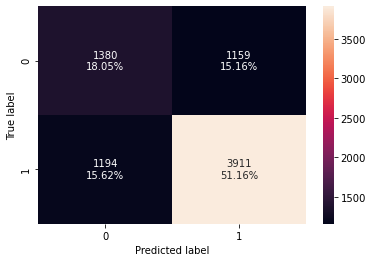

In [89]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [90]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.692177  0.766112     0.7714  0.768747


#### Observations
* The model still suffers from overfitting. 
* Improved Recall compared to the decision tree classifier. 

## Bagging Classifier with weighted decision tree

In [91]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.3,1:0.7},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.3,
                                                                      1: 0.7},
                                                        random_state=1),
                  random_state=1)

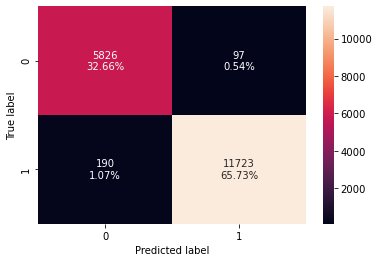

In [92]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [93]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.983909  0.984051   0.991794  0.987907


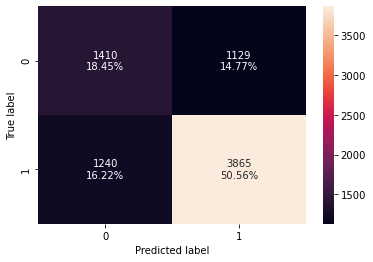

In [94]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [95]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.690084  0.757101   0.773929  0.765422


#### Observation
* The model suffers from overfitting however still has a better Recall value than the decision tree model. 


## Random Forest

In [96]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


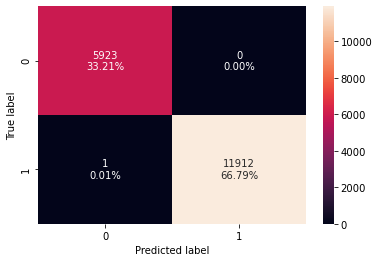

In [97]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)
confusion_matrix_sklearn(rf,X_train,y_train)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.719126  0.830167   0.768032  0.797891


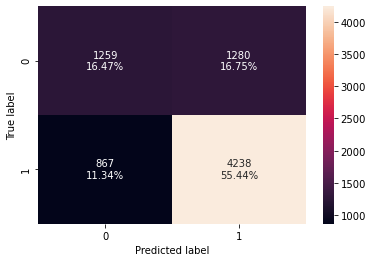

In [98]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)
confusion_matrix_sklearn(rf,X_test,y_test)

### Random forest with class weights

In [99]:
rf_wt = RandomForestClassifier(class_weight={0:0.3,1:0.7}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


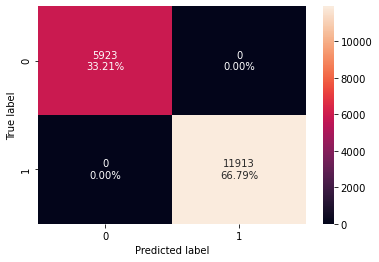

In [100]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)
confusion_matrix_sklearn(rf_wt, X_train,y_train)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.718603  0.82331    0.77091  0.796249


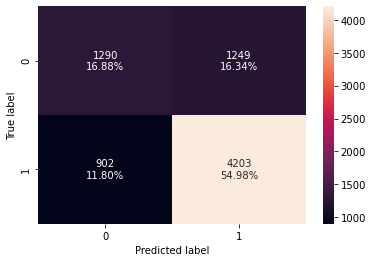

In [101]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)
confusion_matrix_sklearn(rf_wt, X_test,y_test)

#### Observations
* Random forest models with and without class weights are overfitted. 
* Random Forests have the best improvment on the Recall value out of all the bagging models created.
* Adding weights to the variables slightly increases perfomance. 


### Gradient Boosting

In [102]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Training perfomance 
    Accuracy    Recall  Precision        F1
0  0.759419  0.882901   0.784106  0.830576


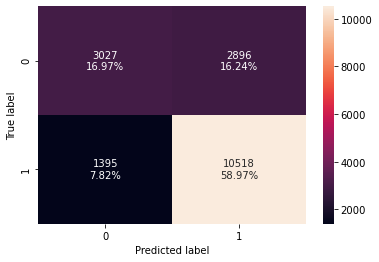

In [103]:
gb_model_perf=model_performance_classification_sklearn(gb_estimator, X_train, y_train)
print("Training perfomance \n", gb_model_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_estimator, X_train,y_train)

Testing perfomance 
    Accuracy    Recall  Precision       F1
0  0.744636  0.873262   0.773555  0.82039


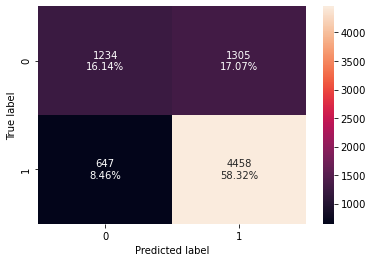

In [104]:
gb_model_perf_test=model_performance_classification_sklearn(gb_estimator, X_test, y_test)
print("Testing perfomance \n", gb_model_perf_test)
#Creating confusion matrix
confusion_matrix_sklearn(gb_estimator, X_test,y_test)

#### Observations
* Gradient boosting model does not suffer from overfitting
* Recall on training and test data are separated by 0.1.
* F1 perfomance however drops by 0.1

## Adaptive Boosting

In [105]:
ab_classifier=AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.738058  0.887434   0.760411  0.819027


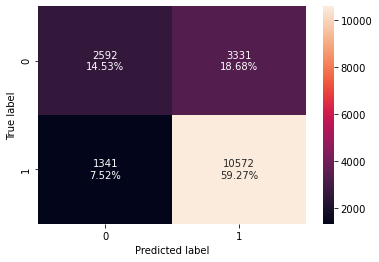

In [106]:
ab_classifier_train_perf = model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance \n",ab_classifier_train_perf)

#Creating confusion Matrix
confusion_matrix_sklearn(ab_classifier, X_train,y_train)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.732993  0.885015    0.75653  0.815744


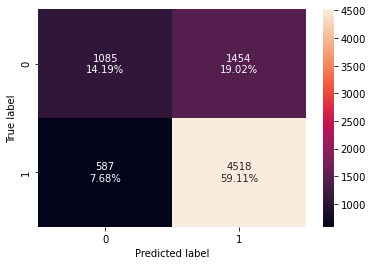

In [107]:
ab_classifier_test_perf = model_performance_classification_sklearn(ab_classifier, X_test,y_test)
print("Training performance \n",ab_classifier_test_perf)
confusion_matrix_sklearn(ab_classifier, X_test,y_test)

#### Observations
* Model does not suffer from overfitting. 
* Close recall and f1 perfomance on both training and testing data

## XGBoost 

In [108]:
xgb_estimator=XGBClassifier(random_state=1, verbosity = 0, eval_metric="logloss")
xgb_estimator.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

Training perfomance 
    Accuracy  Recall  Precision        F1
0  0.838248   0.931   0.843166  0.884908


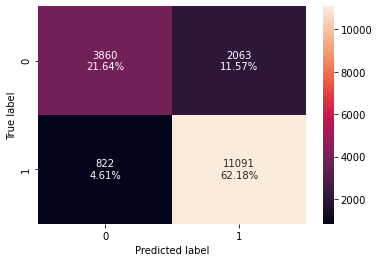

In [109]:
xgb_model_perf=model_performance_classification_sklearn(xgb_estimator, X_train, y_train)
print("Training perfomance \n", xgb_model_perf)

#Confusion Matrix
confusion_matrix_sklearn(xgb_estimator, X_train,y_train)

Training perfomance 
    Accuracy    Recall  Precision        F1
0  0.735348  0.863271   0.768842  0.813325


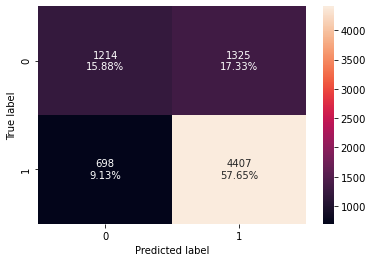

In [110]:
xgb_model_perf_test=model_performance_classification_sklearn(xgb_estimator, X_test, y_test)
print("Training perfomance \n", xgb_model_perf_test)
confusion_matrix_sklearn(xgb_estimator, X_test,y_test)

#### Observations
* Model has slight overfitting. Differnce between trainign and test recall values is approximately 0.8%.
* Best performing model(with no tuning) in terms of overfitting, recall and F1 scores

##  Will tuning the hyperparameters improve the model performance?

Hyperparamters for the ensemble methods, both sequential and parallel methods will be adjusted.<br>
After tuning, the respective methods model's perfomance will be calculated.<br>
To justify tuning, the perfomance will be compared to metric before tuning

In [111]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.3,1:0.7},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

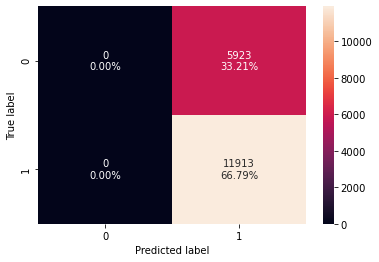

In [112]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [113]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901


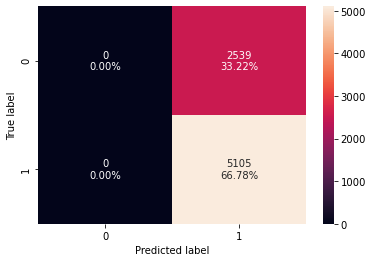

In [114]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [115]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


#### Observations
* Tuned model has an accuracy of 1 due to a lack of False Negatives in the confusion matrix. 
* No difference in training and testing recall shows that the model wasn't overfitting. 
* Approximately equal F1 scores on the models

## Tuning Bagging Classifier

In [116]:
param_grid = {'max_samples': [0.7,0.8,0.9,1],
              'n_estimators':[101, 210,325,450],
              'max_features': [0.7,0.8,0.9]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=101,
                  random_state=1)

In [117]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.3,
                                                                      1: 0.7},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.3,
                                                                      1: 0.7},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901


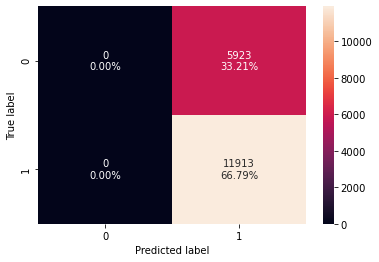

In [118]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

#Confusion Matrix
confusion_matrix_sklearn(bagging_estimator, X_train,y_train)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


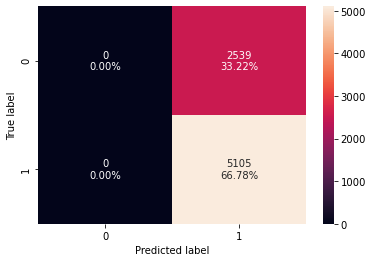

In [119]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

#Confusion Matrix
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

#### Observation
* Trained bagging estimator has similar perfomance as tuned decision tree classifier. This could be attributed to the base estimator in the tuned bagging classifier to be desicon trees. 
* Model does not appear to be suffering from overfitting. Could be attributed to no True Positives and False Negatives predicted by the model. 
* Model cannot accurately determine coorectly if an applicant will be succesfull from training data.

### Tuning Random Forest

In [120]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,150,170,200],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2',None],
        "max_samples": [0.7,0.9],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.7, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.788966  0.904306   0.804135  0.851284


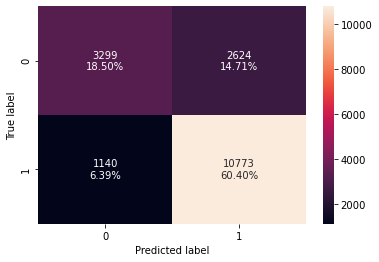

In [121]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

#Confusion Matrix
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.742282  0.873849   0.770866  0.819133


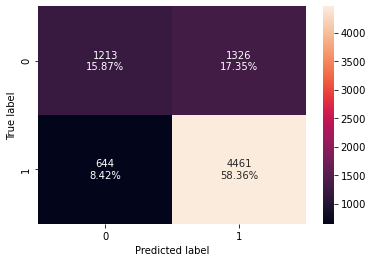

In [122]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

#Confusion Matrix
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

#### Observations
* Good model perfomance with 0.03 and 0.04 difference between recall and F1 metrics respectively for the training and testing data


### Gradient Boosting Hyperarameter Tuning

In [123]:

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "learning_rate":[0.01, 0.1,1],
    "subsample":[0.8,0.9,1],
    "max_depth":np.arange(1,10,2), 
    "max_features":[0.5,1,"auto","log2", None]

}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features='log2',
                           n_estimators=250, random_state=1, subsample=1)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.76996  0.903299   0.784787  0.839883


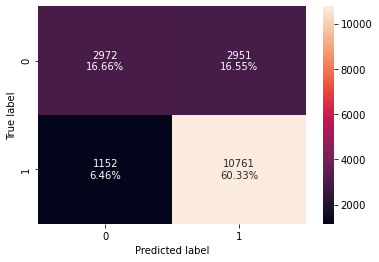

In [124]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.744375  0.886778   0.766898  0.822493


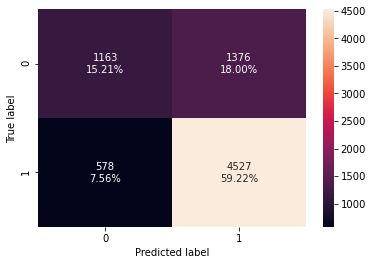

In [125]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Training performance \n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)



#### Observations
* No overfitting after tuning. Good model perfomance

### Adaptive Boosting Hyperparameter tuning

In [ ]:

# Grid of parameters to choose from
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=10),
                      DecisionTreeClassifier(max_depth=20)],
    "n_estimators": np.arange(10,110,5),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_classifier, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

#### Due to complexity . Could not compute

### XGBoost Hyperparameter tuning

In [24]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.759587  0.88374   0.783858  0.830808
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745683  0.876004   0.773301  0.821455


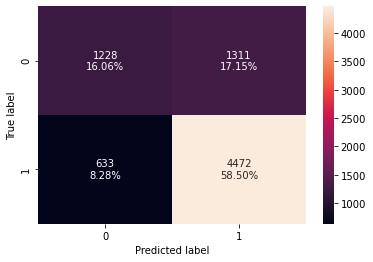

In [25]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance \n",xgb_tuned_model_train_perf)


#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

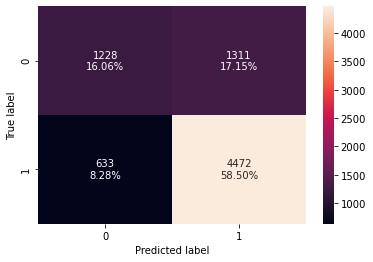

In [28]:
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Training performance \n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [129]:
#XGB Training perfomance
xgb_tuned_model_train_perf={'Accuracy':0.759587, "Recall":0.88734, "Precision":0.783858, "F1":0.830808}
xgb_tuned_model_train_perf_pd=pd.DataFrame(data=xgb_tuned_model_train_perf, index=[0])
print(xgb_tuned_model_train_perf_pd)

   Accuracy   Recall  Precision        F1
0  0.759587  0.88734   0.783858  0.830808


In [130]:
#XGb Testing perfomance
xgb_tuned_model_test_perf={'Accuracy':0.745683, "Recall":0.876004, "Precision":0.773301, "F1":0.821455}
xgb_tuned_model_test_perf_pd=pd.DataFrame(data=xgb_tuned_model_test_perf, index=[0])
print(xgb_tuned_model_test_perf_pd)

   Accuracy    Recall  Precision        F1
0  0.745683  0.876004   0.773301  0.821455


#### Observations
* Model does not suffer from overfitting.
* High Recall and f1 values.

## Model Performance Comparison and Conclusions

In [133]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,gb_model_perf.T,ab_classifier_train_perf.T,xgb_model_perf.T,rf_wt_model_train_perf.T,dtree_model_train_perf.T, bagging_estimator_model_train_perf.T,rf_estimator_model_train_perf.T, xgb_tuned_model_train_perf_pd.T,gbc_tuned_model_train_perf.T,],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Gradient Boosting",
    "Adaptive Boosting", 
    "XGBoost",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator", 
    "XGBoost Tuned",
    "Gradient Boosting tuned"]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree,1.000000,1.000000,1.000000,1.000000
Bagging Classifier,0.985367,0.986317,0.991729,0.989016
Weighted Bagging Classifier,0.983909,0.984051,0.991794,0.987907
Random Forest Classifier,0.999944,0.999916,1.000000,0.999958
Gradient Boosting,0.759419,0.882901,0.784106,0.830576
Adaptive Boosting,0.738058,0.887434,0.760411,0.819027
XGBoost,0.838248,0.931000,0.843166,0.884908
Weighted Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
Decision Tree Estimator,1.000000,1.000000,1.000000,1.000000
Bagging Estimator,0.667919,1.000000,0.667919,0.800901


In [137]:
# training performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,gb_model_perf_test.T,ab_classifier_test_perf.T,xgb_model_perf_test.T,
    rf_wt_model_test_perf.T,dtree_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T,xgb_tuned_model_test_perf_pd.T, gbc_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
     "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Gradient Boosting",
    "Adaptive Boosting", 
    "XGBoost",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator",
    "XGBoost tuned",     
    "Gradient Boosting tuned"]
print("Testing performance comparison:")
models_test_comp_df.T

Testing performance comparison:


,Accuracy,Recall,Precision,F1
Decision Tree,0.649137,0.726543,0.742543,0.734455
Bagging Classifier,0.692177,0.766112,0.771400,0.768747
Weighted Bagging Classifier,0.690084,0.757101,0.773929,0.765422
Random Forest Classifier,0.719126,0.830167,0.768032,0.797891
Gradient Boosting,0.744636,0.873262,0.773555,0.820390
Adaptive Boosting,0.732993,0.885015,0.756530,0.815744
XGBoost,0.735348,0.863271,0.768842,0.813325
Weighted Random Forest Classifier,0.718603,0.823310,0.770910,0.796249
Decision Tree Estimator,0.649137,0.726543,0.742543,0.734455
Bagging Estimator,0.667844,1.000000,0.667844,0.800847


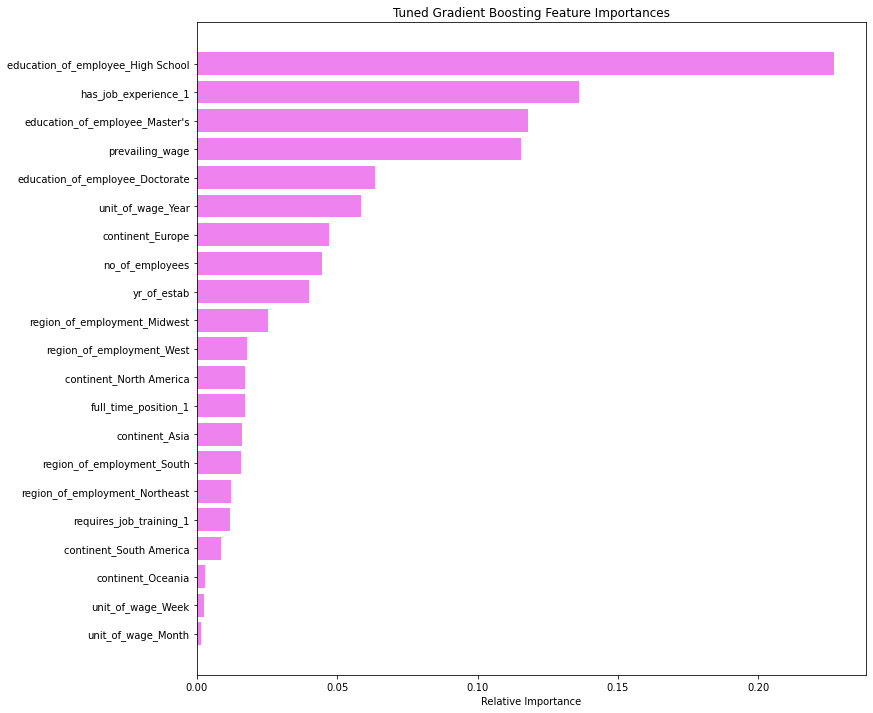

In [138]:
#Important variables from best perfoming model(Tuned Gradient Boosting Model)
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Tuned Gradient Boosting Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

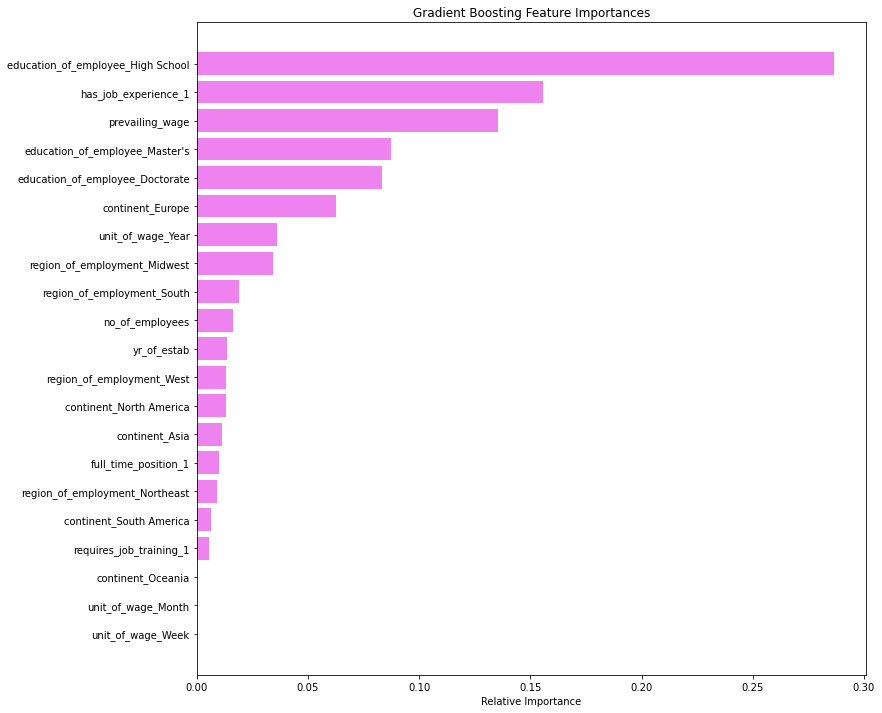

In [139]:
# In comparison, Importance of base level gradient boosting
#mportant variables from best perfoming model(Tuned Gradient Boosting Model)
feature_names = X_train.columns
importances = gb_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Gradient Boosting Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

* The best perfoming model ranks the following charactirstics of the applicant's profile:<br>
    1. A higher education than High School degree. Optimal candidate is a Master's degree holder
    2. The applicant should have work experience.
    3. A high wage offered to the applicant.
    4. The applicant is has a full time contract of employment.    
* From the same model, an organisation is more likely to have recruit successfully if they:<br>
    1. They are offering a high wage
    2. Are a large oganisation with a large workforce
* With the help from the visualisations of the data, process efficiency should focus on improving the following pipelines<br>
    1. Asia. They form the highest contributors of applicants.
    2. To the Iskands. The islands are offering the highest wages for foreigners and those accepetd. The region has the lowest levels of education in the dataset. 
    3. Africa. The applicants form a majority of the workforce in existing American companies in all regions.
     
